In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as s
from scipy import stats as ss

In [3]:
data=pd.read_csv(r"C:\Users\akhil\Downloads\autos (2).csv")

In [4]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
data['seller'].unique()

array(['privat', 'gewerblich'], dtype=object)

In [6]:
data['offerType'].unique()

array(['Angebot', 'Gesuch'], dtype=object)

In [7]:
data['abtest'].unique()

array(['test', 'control'], dtype=object)

In [8]:
data['vehicleType'].value_counts()

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [9]:
data.fillna({"notRepairedDamage":data["notRepairedDamage"].mode()[0],"fuelType":data["fuelType"].mode()[0],"vehicleType":data["vehicleType"].mode()[0],"gearbox":data["gearbox"].mode()[0],"model":data["model"].mode()[0]},inplace=True)


In [10]:
data['vehicleType'].fillna('Noname',inplace=True)

In [11]:
data['yearOfRegistration'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1968, 1982, 1976, 1983, 1959, 1973, 1111, 1969, 1971,
       1987, 1986, 1988, 1967, 1970, 1965, 1945, 1925, 1974, 1979, 1955,
       1978, 1972, 1977, 1961, 1963, 1964, 1960, 1966, 1975, 1937, 1936,
       5000, 1954, 1958, 9999, 1956, 3200, 1000, 1933, 1941, 1962, 8888,
       1500, 2200, 4100, 1929, 1951, 1957, 1940, 3000, 2066, 1949, 2019,
       1800, 1953, 1935, 1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911,
       1400, 1950, 4000, 1948, 1952, 1200, 8500, 1932, 1255, 1927, 1923,
       1931, 3700, 3800, 4800, 1942, 7000, 1911, 6500, 2290, 2500, 1930,
       1001, 6200, 9450, 1944, 1943, 1947, 1934, 1938, 1688, 2800, 1253,
       1928, 7500, 1919, 5555, 7777, 5600, 1600, 1939, 2222, 1039, 9996,
       1300, 8455, 1915, 4500, 1920, 1602, 7800, 92

In [12]:
data['gearbox'].fillna('Noname',inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          371528 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              371528 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                371528 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             371528 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    371528 non-nu

In [14]:
len(data['name'].unique())

233531

In [15]:
#2)Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot

In [17]:
data["yearOfRegistration"] = data["yearOfRegistration"].where((data["yearOfRegistration"] >= 1950) & (data["yearOfRegistration"] <= 2023),data["yearOfRegistration"].mode()[0])


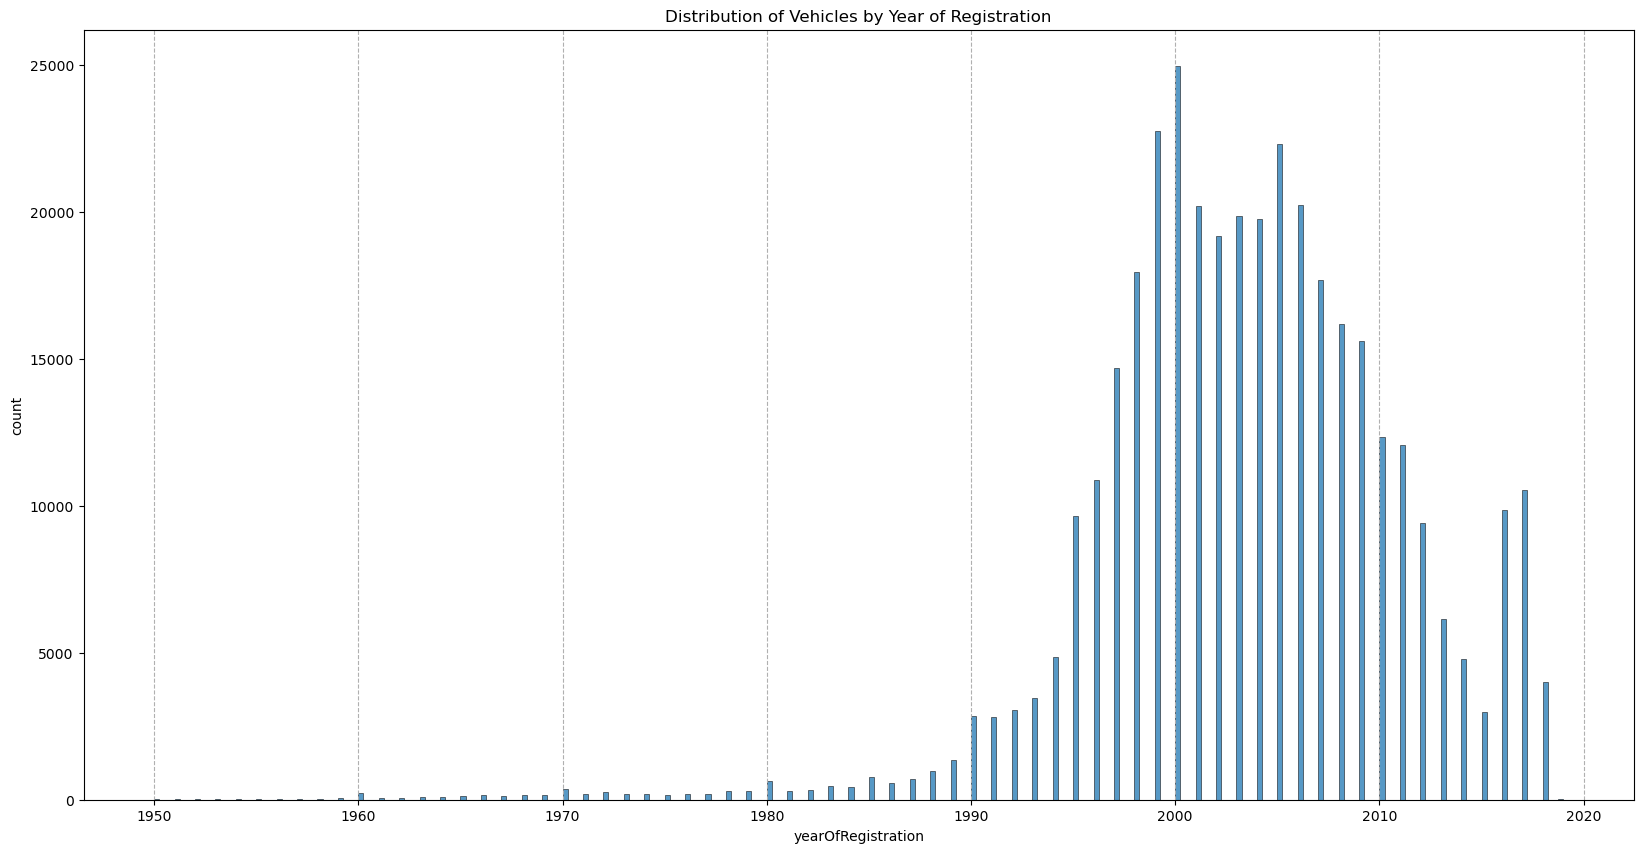

In [18]:
plt.figure(figsize=(20,10))
sns.histplot(data=data, x=data["yearOfRegistration"])
plt.title("Distribution of Vehicles by Year of Registration")
plt.ylabel("count")
plt.xlabel("yearOfRegistration")
plt.grid(axis='x', linestyle='--')
plt.show()

In [21]:
# 4)Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client

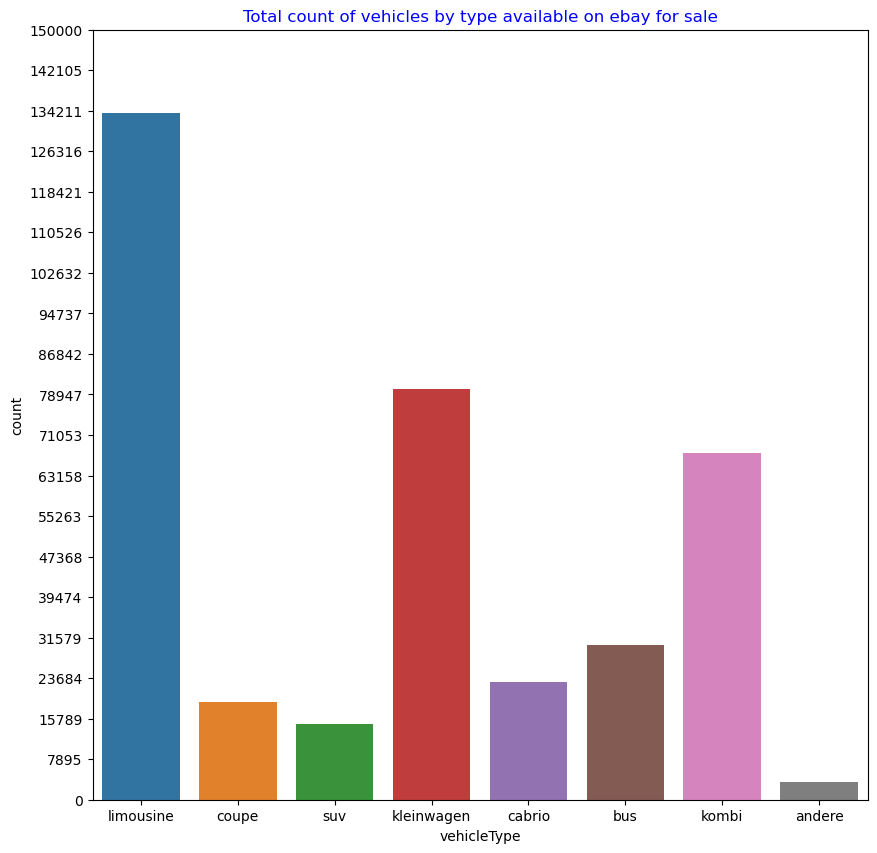

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['vehicleType'])
plt.title('Total count of vehicles by type available on ebay for sale',color='b')

plt.yticks(pd.Series(np.linspace(0,150000,20)))
plt.show()

In [23]:
# 5)Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)

In [24]:
relation=data[['price','kilometer']].corr(method='spearman')

In [25]:
relation

,price,kilometer
price,1.000000,-0.373047
kilometer,-0.373047,1.000000


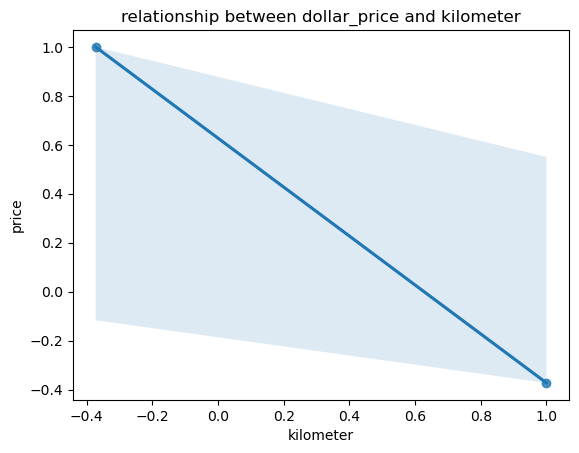

In [26]:
sns.regplot(x='kilometer',y='price',data=relation)
plt.title("relationship between dollar_price and kilometer")
plt.show()

In [28]:
#B.(1) Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization

In [29]:
data['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

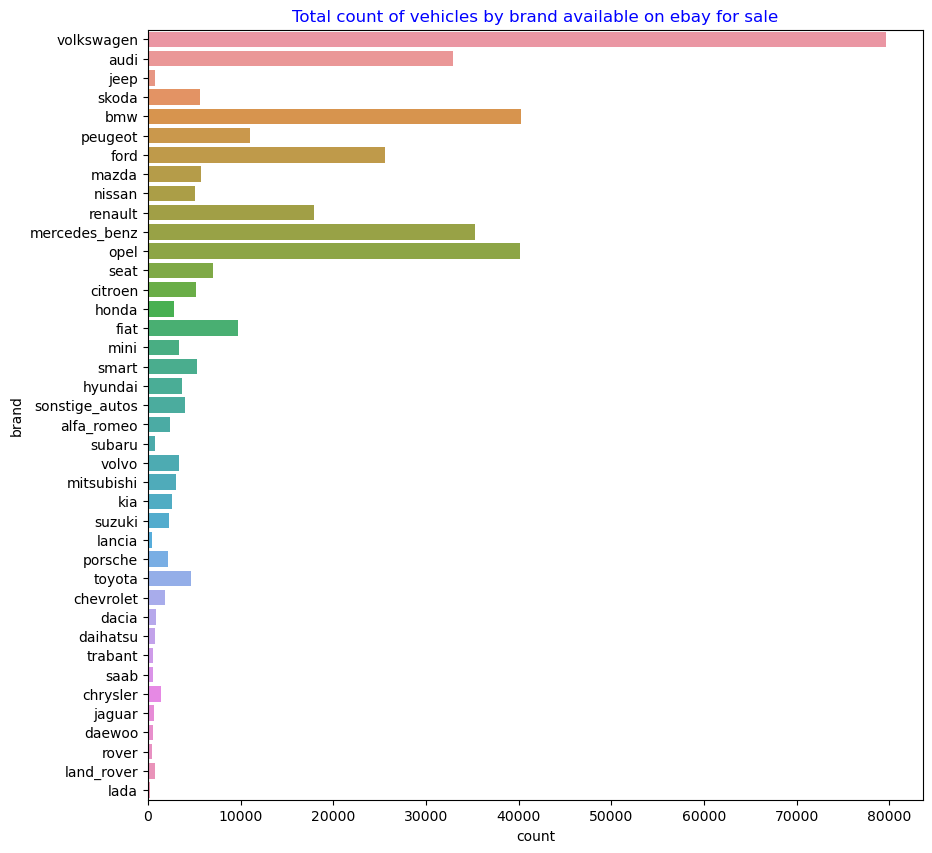

In [30]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['brand'])
plt.title('Total count of vehicles by brand available on ebay for sale',color='b')
plt.show()

In [33]:

#What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis ?


In [34]:
x = data.groupby(['vehicleType','gearbox'])['price'].agg('mean').unstack()

In [35]:
x

gearbox,automatik,manuell
vehicleType,,
andere,7366.861496,758055.365154
bus,10599.265713,10244.418314
cabrio,16254.374208,14674.193796
coupe,35500.199567,21561.150169
kleinwagen,3889.552200,5842.936603
kombi,8910.045892,7323.746801
limousine,17375.917378,12641.186224
suv,16764.091774,9913.012436


In [36]:
pd.crosstab(index=data['seller'],columns=data['gearbox'],normalize='columns',margins=True)

gearbox,automatik,manuell,All
seller,,,
gewerblich,0.000013,0.000007,0.000008
privat,0.999987,0.999993,0.999992


In [37]:
x = data.groupby(['vehicleType','gearbox'])['price'].mean().reset_index()

In [38]:
x

,vehicleType,gearbox,price
0,andere,automatik,7366.861496
1,andere,manuell,758055.365154
2,bus,automatik,10599.265713
3,bus,manuell,10244.418314
4,cabrio,automatik,16254.374208
5,cabrio,manuell,14674.193796
6,coupe,automatik,35500.199567
7,coupe,manuell,21561.150169
8,kleinwagen,automatik,3889.552200
9,kleinwagen,manuell,5842.936603


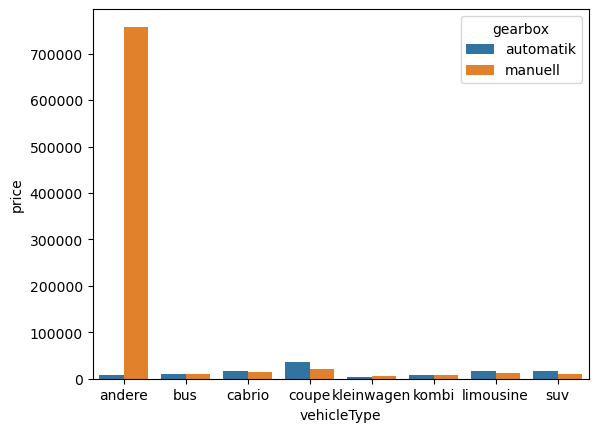

In [39]:
sns.barplot(data=x,x='vehicleType',y='price',hue='gearbox')
plt.show()

In [40]:
#2)What is the Average price of vehicle by fuel type and gearbox type.Give a plot

In [41]:
x = data.groupby(['fuelType','gearbox'])['price'].mean().reset_index()

In [42]:
x

,fuelType,gearbox,price
0,andere,automatik,8.434172e+03
1,andere,manuell,1.199950e+07
2,benzin,automatik,1.185175e+04
3,benzin,manuell,1.139943e+04
4,cng,automatik,6.737718e+03
5,cng,manuell,4.517496e+03
6,diesel,automatik,1.881035e+04
7,diesel,manuell,8.536019e+03
8,elektro,automatik,2.290028e+04
9,elektro,manuell,3.822320e+03


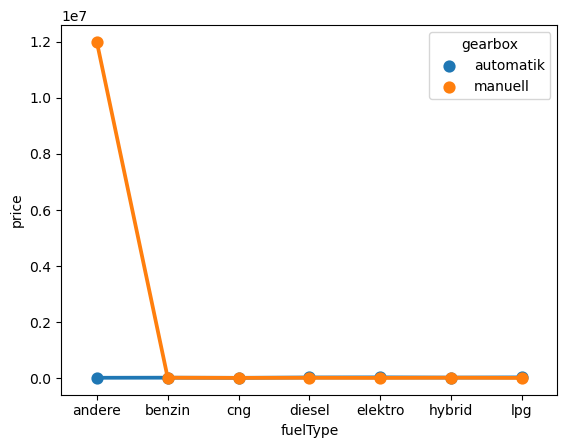

In [43]:
sns.pointplot(data=x,x='fuelType',y='price',hue='gearbox')
plt.show()

In [44]:
x = data.groupby(['vehicleType','gearbox'])['powerPS'].mean().reset_index()

In [45]:
x

,vehicleType,gearbox,powerPS
0,andere,automatik,124.922438
1,andere,manuell,99.375501
2,bus,automatik,140.884166
3,bus,manuell,108.204303
4,cabrio,automatik,188.922414
5,cabrio,manuell,130.729464
6,coupe,automatik,218.719307
7,coupe,manuell,151.884799
8,kleinwagen,automatik,75.040381
9,kleinwagen,manuell,68.243105


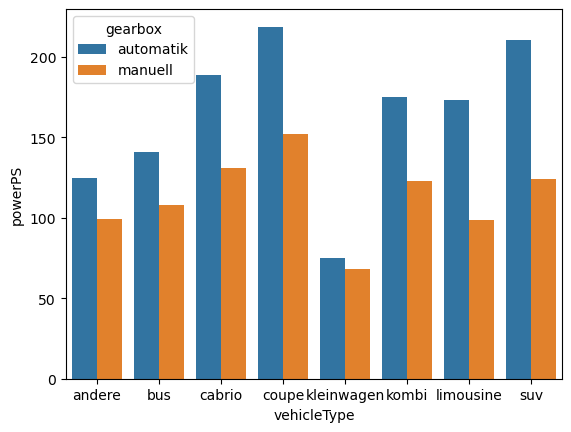

In [46]:
sns.barplot(data=x,x='vehicleType',y='powerPS',hue='gearbox')
plt.show()

In [47]:
#4)What is the Average price of a vehicle by brand as well as vehicle type.Use heatmap to explain this

In [48]:
x = data.groupby(['brand','vehicleType'])['price'].mean().unstack()

In [49]:
x

vehicleType,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,
alfa_romeo,3.153333e+03,NaN,9147.179487,6897.190083,4466.242678,3580.161926,64882.923913,0.000000
audi,9.768120e+04,3485.000000,13441.196564,16341.915486,7358.435834,17069.568857,15122.772555,24599.234542
bmw,2.686439e+03,27569.884615,38010.594552,32097.647113,4432.658696,9001.496376,9917.253074,15924.963470
chevrolet,1.003280e+04,6189.300000,24026.621622,16317.023438,3029.557461,4899.090090,8056.390957,9830.491228
chrysler,8.888333e+03,2630.515982,4324.531120,9174.240000,3124.833333,4867.845528,3618.367442,5888.391304
citroen,3.521024e+03,4409.132179,4536.408696,2695.552632,3029.278894,3724.929022,25013.264706,10810.540541
dacia,4.450000e+03,8606.700000,NaN,NaN,4878.726457,4166.642857,3648.571429,9761.972093
daewoo,9.938000e+02,1262.777778,900.000000,428.625000,1110.324627,816.340426,921.221622,1900.000000
daihatsu,1.075000e+03,1201.500000,7761.000000,NaN,1449.787476,3420.294118,1713.067568,2066.918367


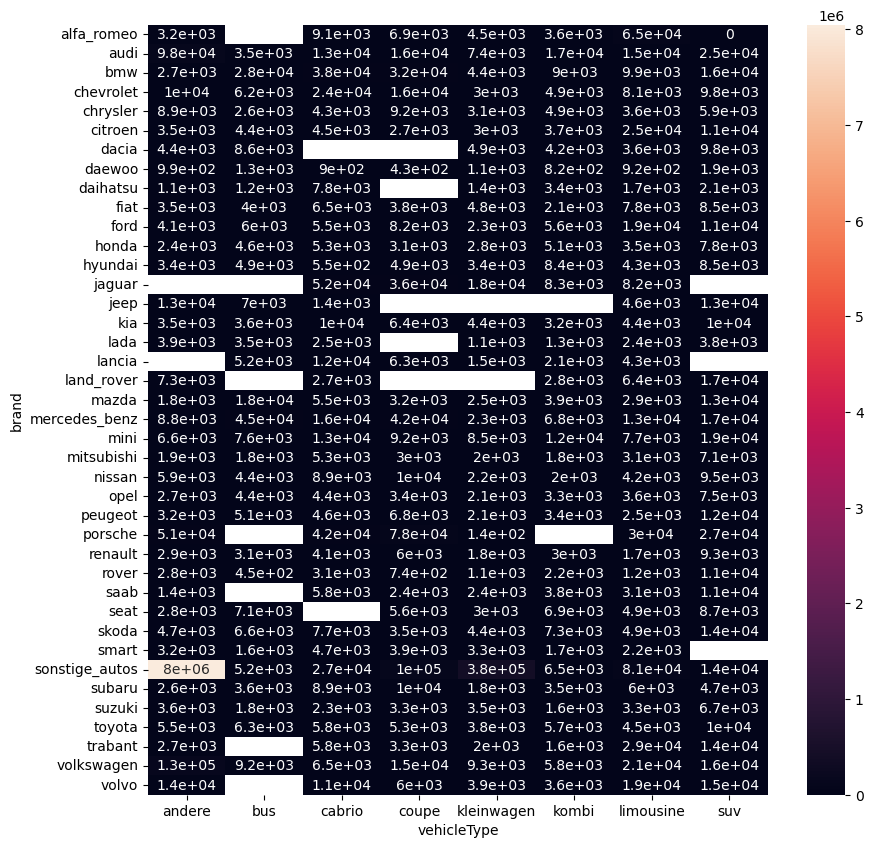

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(x,annot=True)
plt.show()

In [51]:
x = data.groupby(['vehicleType','gearbox'])['powerPS'].mean()

In [52]:
x

vehicleType  gearbox  
andere       automatik    124.922438
             manuell       99.375501
bus          automatik    140.884166
             manuell      108.204303
cabrio       automatik    188.922414
             manuell      130.729464
coupe        automatik    218.719307
             manuell      151.884799
kleinwagen   automatik     75.040381
             manuell       68.243105
kombi        automatik    174.859625
             manuell      122.672961
limousine    automatik    173.118946
             manuell       98.866436
suv          automatik    210.521964
             manuell      123.911232
Name: powerPS, dtype: float64

In [53]:
x = data.groupby(['brand','vehicleType'])['price'].mean().unstack()

In [54]:
x

vehicleType,andere,bus,cabrio,coupe,kleinwagen,kombi,limousine,suv
brand,,,,,,,,
alfa_romeo,3.153333e+03,NaN,9147.179487,6897.190083,4466.242678,3580.161926,64882.923913,0.000000
audi,9.768120e+04,3485.000000,13441.196564,16341.915486,7358.435834,17069.568857,15122.772555,24599.234542
bmw,2.686439e+03,27569.884615,38010.594552,32097.647113,4432.658696,9001.496376,9917.253074,15924.963470
chevrolet,1.003280e+04,6189.300000,24026.621622,16317.023438,3029.557461,4899.090090,8056.390957,9830.491228
chrysler,8.888333e+03,2630.515982,4324.531120,9174.240000,3124.833333,4867.845528,3618.367442,5888.391304
citroen,3.521024e+03,4409.132179,4536.408696,2695.552632,3029.278894,3724.929022,25013.264706,10810.540541
dacia,4.450000e+03,8606.700000,NaN,NaN,4878.726457,4166.642857,3648.571429,9761.972093
daewoo,9.938000e+02,1262.777778,900.000000,428.625000,1110.324627,816.340426,921.221622,1900.000000
daihatsu,1.075000e+03,1201.500000,7761.000000,NaN,1449.787476,3420.294118,1713.067568,2066.918367


In [55]:
x = data.groupby(['brand','vehicleType'])['price'].mean().reset_index()

In [56]:
x

,brand,vehicleType,price
0,alfa_romeo,andere,3153.333333
1,alfa_romeo,cabrio,9147.179487
2,alfa_romeo,coupe,6897.190083
3,alfa_romeo,kleinwagen,4466.242678
4,alfa_romeo,kombi,3580.161926
...,...,...,...
292,volvo,coupe,6040.930556
293,volvo,kleinwagen,3912.714286
294,volvo,kombi,3583.711310
295,volvo,limousine,18840.519164
